In [1]:
import torch
import torchvision
import torch.nn as nn

import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image


c:\Users\kde96\.conda\envs\PyeonHaeng\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:

device = 'cuda' if torch.cuda.is_available() else 'cpu'
cnn_model = torchvision.models.resnet34(weights=True)
num_features = cnn_model.fc.in_features
cnn_model.fc = nn.Linear(num_features, 14)
cnn_model.load_state_dict(torch.load('./PyeonHaengModel_ver1.pth'))
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn_model.parameters(), lr=0.001, momentum=0.9)

cnn_model.cuda()


transforms_test = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

class_names = ['beverage_bottle_glass', 'beverage_can', 'beverage_milk_coffee', 'dailyneccsity_toothe', 'dailynecessity_etc', 'iceCream_Corn', 'iceCream_etc', 'iceCream_pint', 'instanceFood_Bag', 'instanceFood_Sauage', 'instanceFood_etc', 'noodle', 'snack_bag', 'snack_box']

c:\Users\kde96\.conda\envs\PyeonHaeng\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    
    plt.imshow(input)
    plt.title(title)
    plt.show()


In [6]:
# 이미지 분류 함수 정의
def classify_image(image_path, model, transforms):
    image = Image.open(image_path)
    image = transforms(image).unsqueeze(0).to(device)
    with torch.no_grad():
        outputs = model(image)
        _, preds = torch.max(outputs, 1)
    return preds[0]


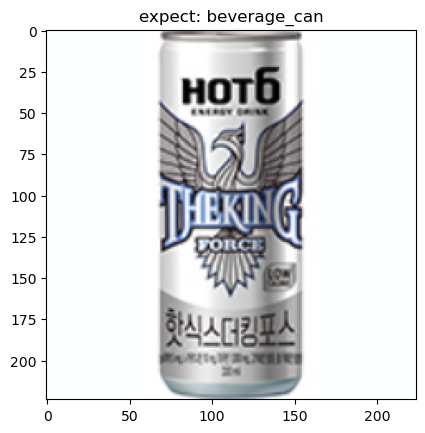

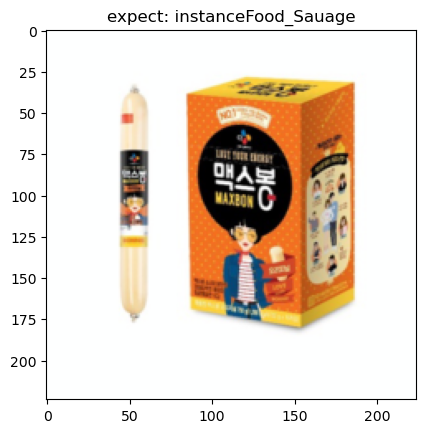

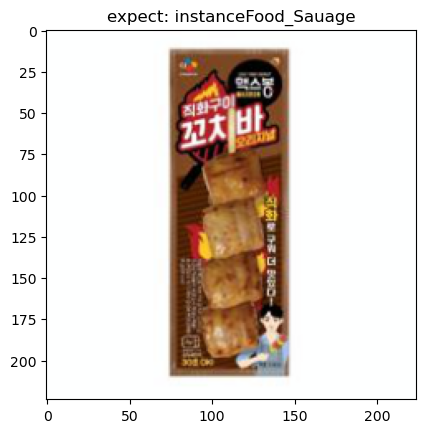

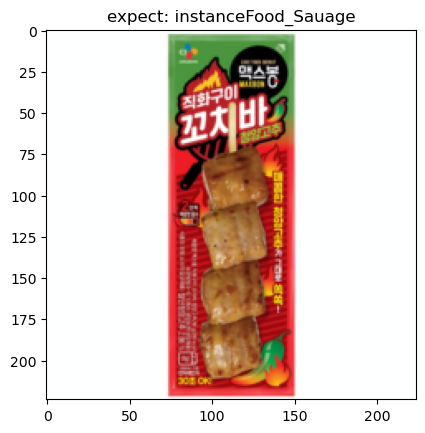

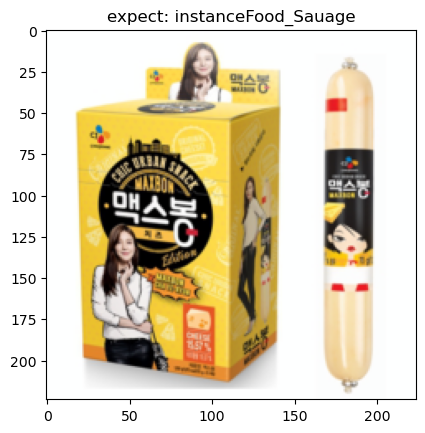

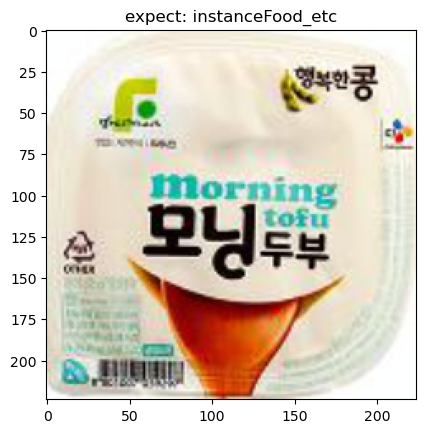

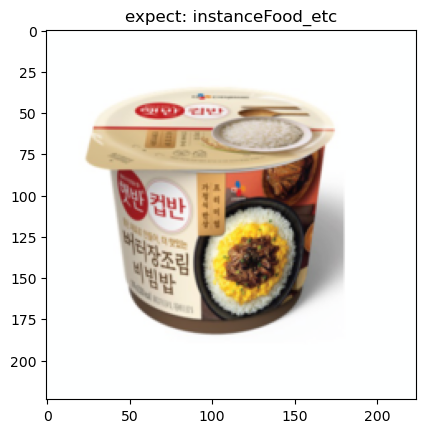

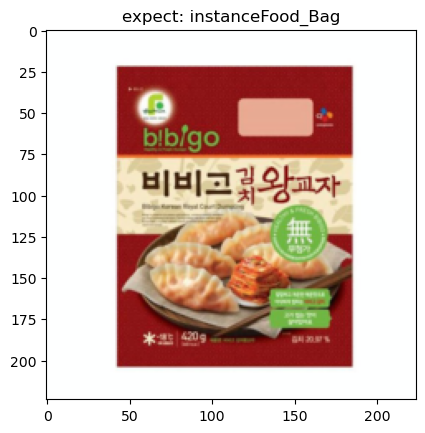

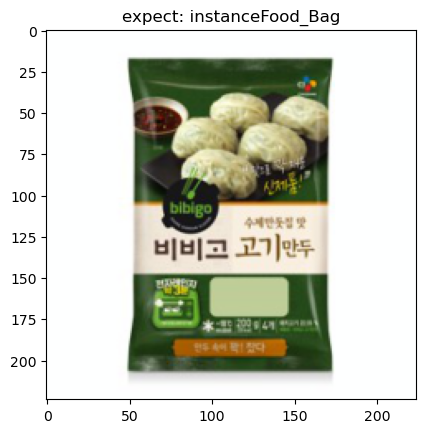

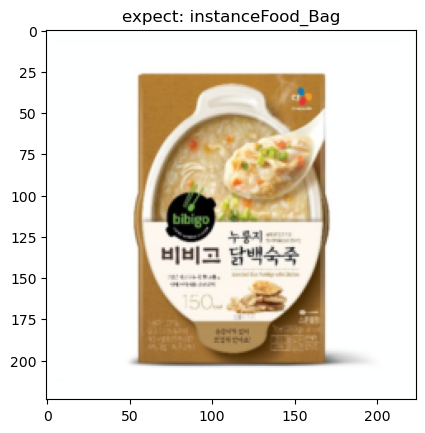

./dataset/AI-dataset/data/test\205.jpg
./dataset/AI-dataset/data/test\208.jpg
./dataset/AI-dataset/data/test\1549.jpg
./dataset/AI-dataset/data/test\1703.jpg
./dataset/AI-dataset/data/test\5671.jpg
./dataset/AI-dataset/data/test\8905.jpg
./dataset/AI-dataset/data/test\9352.jpg
./dataset/AI-dataset/data/test\10570.jpg
./dataset/AI-dataset/data/test\10574.jpg
./dataset/AI-dataset/data/test\12990.jpg
./dataset/AI-dataset/data/test\13046.jpg
./dataset/AI-dataset/data/test\17605.jpg
./dataset/AI-dataset/data/test\17861.jpg


In [7]:
folder_path = './dataset/AI-dataset/data/test'
result_file_path = './result.txt'


for file_name in os.listdir(folder_path):
    if file_name.endswith('.jpg'):
        file_path = os.path.join(folder_path, file_name)
        with Image.open(file_path) as img:
            if img.mode == 'RGBA':
                img = img.convert('RGB')
                img.save(file_path)


with open(result_file_path, 'w') as f:
    cnt = 0
    files = os.listdir(folder_path)
    files.sort(key=lambda x: int(os.path.splitext(x)[0]))

    for file_name in files:
        try:
          file_path = os.path.join(folder_path, file_name)
          predicted_class = classify_image(file_path, cnn_model, transforms_test)
          result_str = f"{file_name}: {class_names[predicted_class]}\n"
          f.write(result_str)

          if cnt < 10:
              image = Image.open(file_path)
              image = transforms_test(image).unsqueeze(0).to(device)
              imshow(image.cpu().data[0], title='expect: ' + class_names[predicted_class])
              cnt += 1
        except:
          print(file_path)


